In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from juno_custom.lattice_generation import lattice_utils
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from juno.Simulation import generate_sq_freq_arr

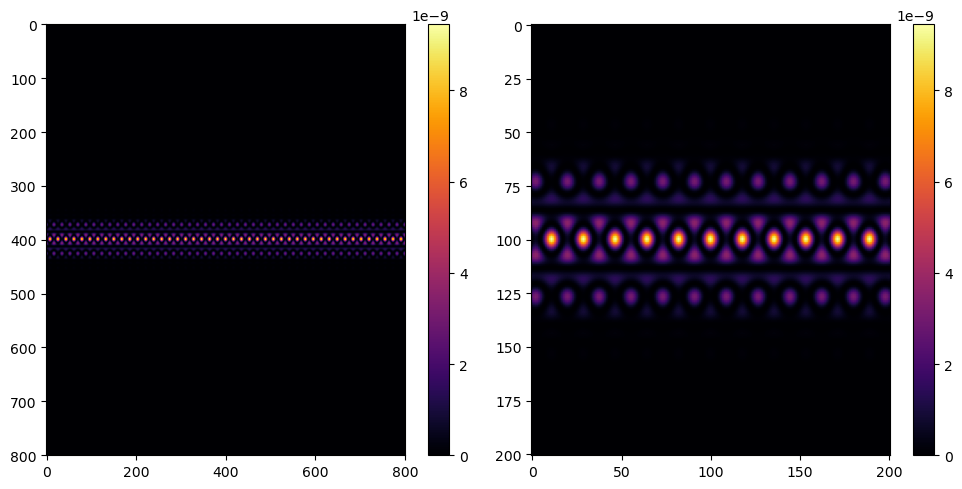

In [46]:
wavefront = np.load(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\wavefront_from_pupil.npy")
wavefront_magnitude = np.abs(wavefront)
wavefront_intensity = np.abs(wavefront)**2
lattice_utils.plot_grid(wavefront_intensity, wavefront_intensity[300:501, 300:501], cmap="inferno", aspect="auto")

In [79]:
#normalise wavefront magnitude
wavefront_magnitude_norm = wavefront_magnitude
# wavefront_magnitude_norm = wavefront_magnitude / np.max(wavefront_magnitude) * np.pi

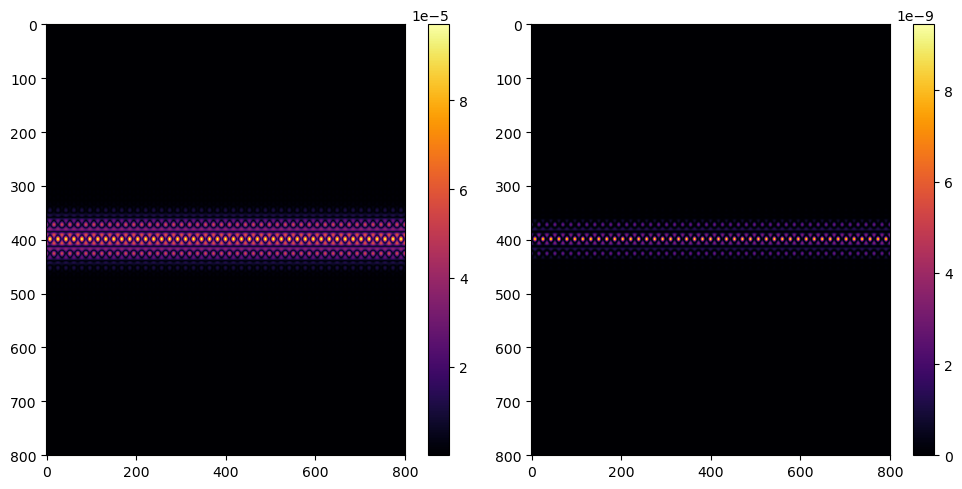

In [73]:
lattice_utils.plot_grid(wavefront_magnitude, wavefront_magnitude_norm, cmap="inferno", aspect="auto")

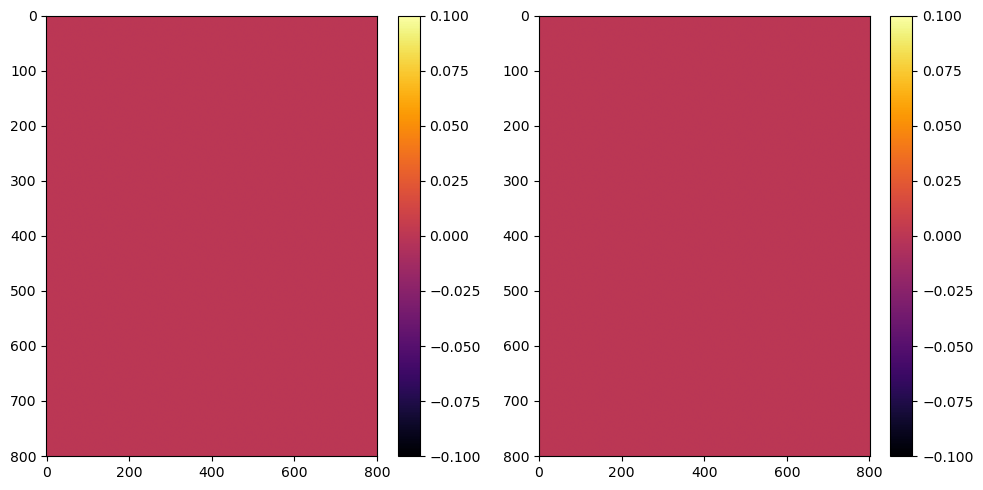

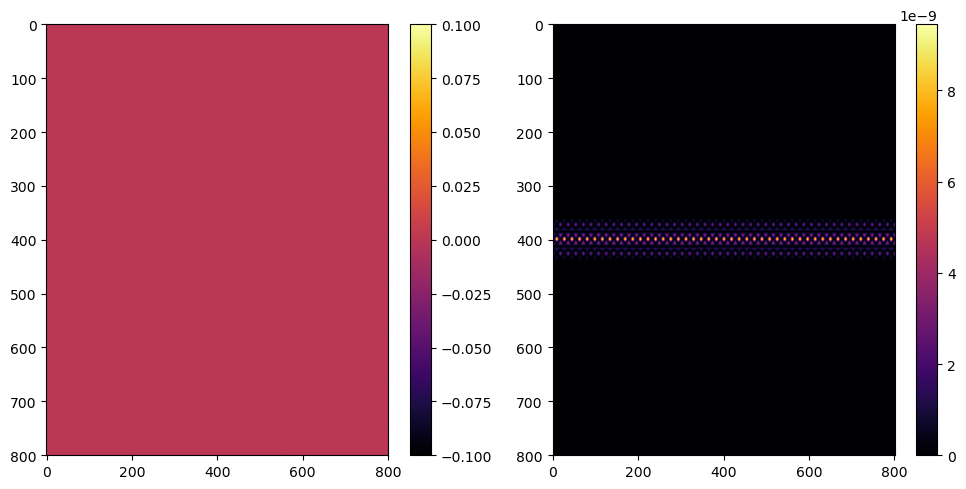

In [74]:
# create new complex field
wavefront_new = 0 + 1j * np.zeros_like(wavefront_magnitude_norm)
lattice_utils.plot_grid(wavefront_new.real, wavefront_new.imag, cmap="inferno", aspect="auto")
wavefront_new.imag = wavefront_magnitude_norm
wavefront_new.real = np.zeros_like(wavefront_magnitude_norm)
lattice_utils.plot_grid(wavefront_new.real, wavefront_new.imag, cmap="inferno", aspect="auto")


In [75]:
wavelength = 488.e-9
n = 1.33
media_wavelength = wavelength/n
wavelength = media_wavelength
wavenumber = 2*np.pi/wavelength
pixel_size = wavelength/4
cmap="inferno"

In [76]:
fft_wavefront = (fft2((wavefront_new)))

realspace_x = wavefront_new.shape[0] * pixel_size / wavelength
realspace_y = wavefront_new.shape[1] * pixel_size / wavelength
freq_arr = (generate_sq_freq_arr(wavefront_new, pixel_size))


In [78]:
import os
for i in range(0, 100):
    distance = 0.25*i*wavelength
    output = lattice_utils.calculate(fft_wavefront, distance, freq_arr, wavenumber)
    os.makedirs(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\output_from_phase_2", exist_ok=True)
    np.save(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\output_from_phase_2\{}.npy".format(i), output)
# distance = 0*wavelength
# lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=0)
# distance = 3*wavelength
# lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=200)
# distance = 6*wavelength
# lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=200)

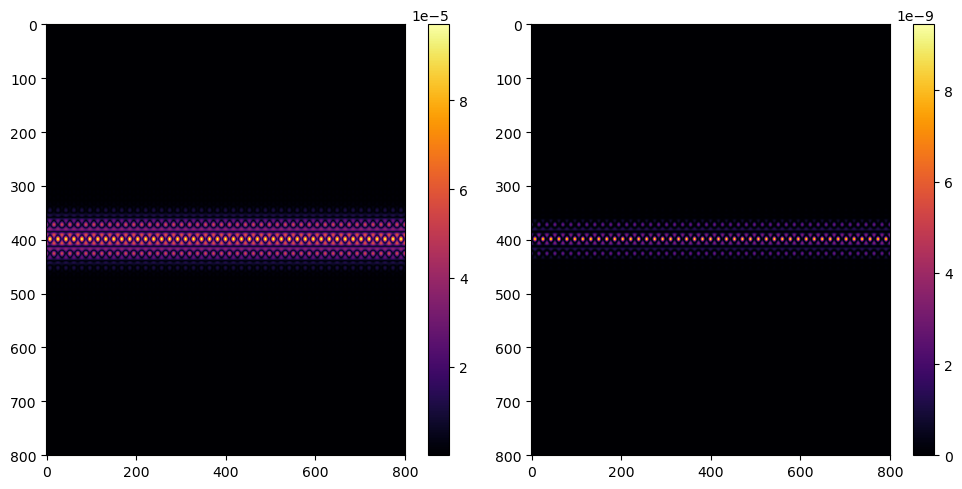

In [80]:
lattice_utils.plot_grid(wavefront_magnitude_norm.real, np.abs(wavefront_magnitude_norm)**2, cmap="inferno", aspect="auto")

In [93]:
wavefront_2 = 1 * np.exp(1j * (wavefront_magnitude_norm)**2)



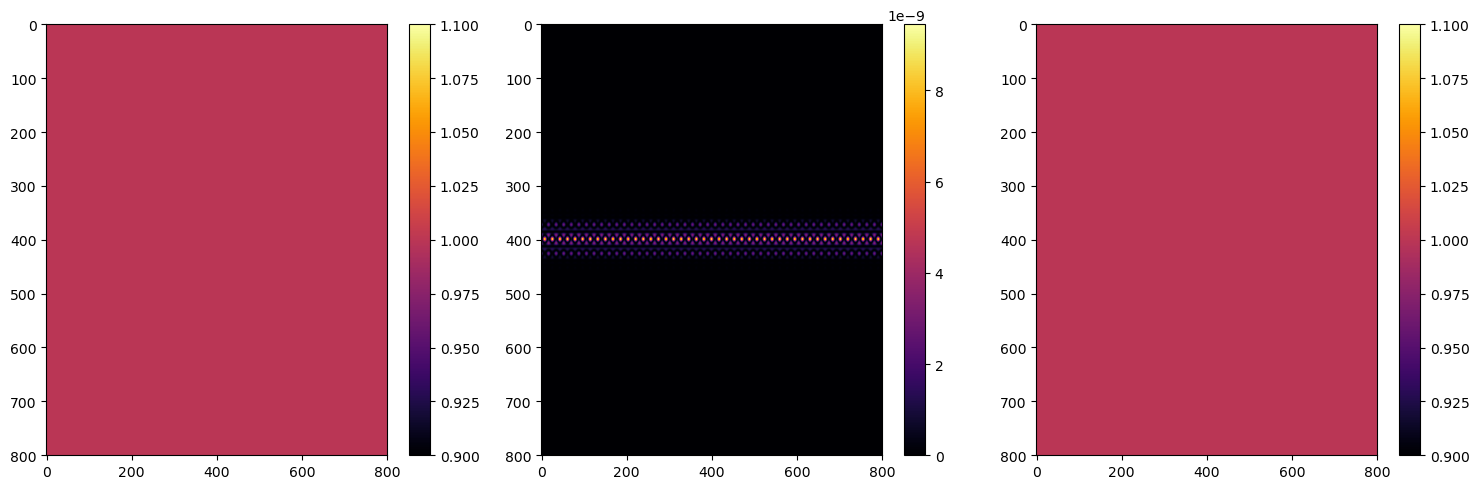

In [94]:
lattice_utils.plot_grid(wavefront_2.real, wavefront_2.imag, np.abs(wavefront_2)**2, cmap="inferno", aspect="auto")

In [95]:
fft_wavefront_2 = (fft2(wavefront_2))

realspace_x = fft_wavefront_2.shape[0] * pixel_size / wavelength
realspace_y = fft_wavefront_2.shape[1] * pixel_size / wavelength
freq_arr = (generate_sq_freq_arr(fft_wavefront_2, pixel_size))


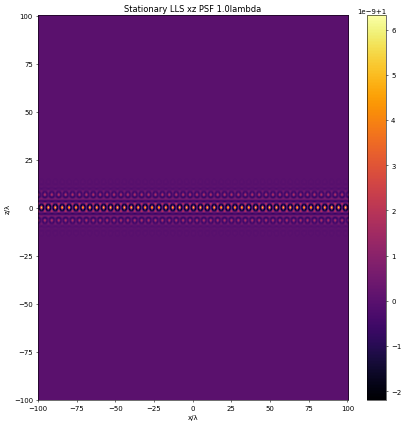

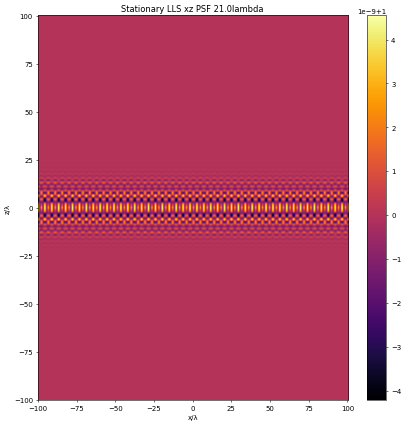

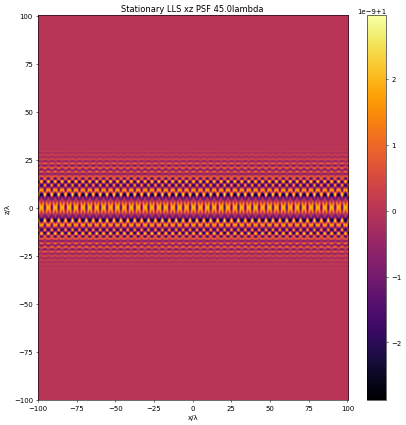

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [99]:
import os
# for i in range(0, 100):
#     distance = 0.25*i*wavelength
#     output = lattice_utils.calculate(fft_wavefront, distance, freq_arr, wavenumber)
#     os.makedirs(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\output_from_phase_2", exist_ok=True)
#     np.save(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\output_from_phase_2\{}.npy".format(i), output)
distance = 1*wavelength
lattice_utils.calculate_and_plot(fft_wavefront_2, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=50)
distance = 21*wavelength
lattice_utils.calculate_and_plot(fft_wavefront_2, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=50)
distance = 45*wavelength
lattice_utils.calculate_and_plot(fft_wavefront_2, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=50)